In [15]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.4 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# הגדרת התאריכים להורדת הנתונים
start_date = '2020-01-01'
end_date = '2025-10-12'

# הורדת הנתונים מ-Yahoo Finance
tickers = ['SPY', 'IEI', 'GLD','QQQ']
data = yf.download(tickers, start=start_date, end=end_date,auto_adjust=False)['Adj Close']

# הגדרת סדרת הזמן והמשתנים האקסוגניים
spy_data = data['SPY']
exog_vars = data[['IEI', 'GLD','QQQ']]




[*********************100%***********************]  4 of 4 completed


Correlation Matrix:
Ticker       GLD       IEI       QQQ       SPY
Ticker                                        
GLD     1.000000  0.160445  0.870881  0.867411
IEI     0.160445  1.000000  0.008529 -0.086656
QQQ     0.870881  0.008529  1.000000  0.988565
SPY     0.867411 -0.086656  0.988565  1.000000


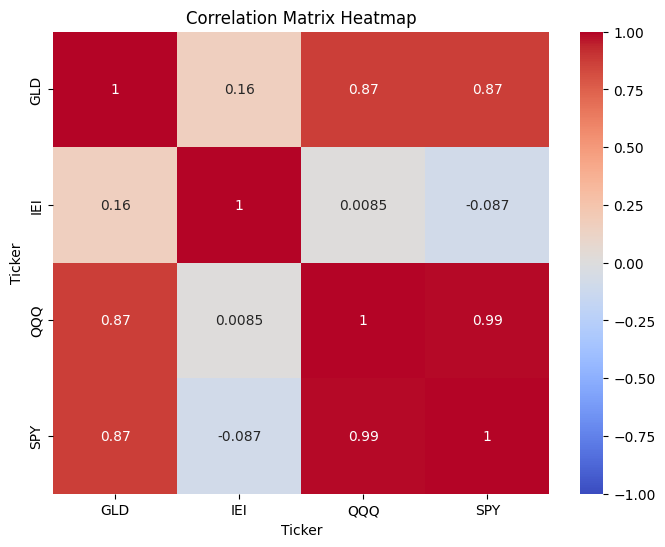

In [3]:
import seaborn as sns
# חישוב המטריצה של המתאמים בין המדדים
correlation_matrix = data.corr()

# הצגת מטריצת הקורלציות
print("Correlation Matrix:")
print(correlation_matrix)

# דיאגרמת Heatmap של מטריצת הקורלציות
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


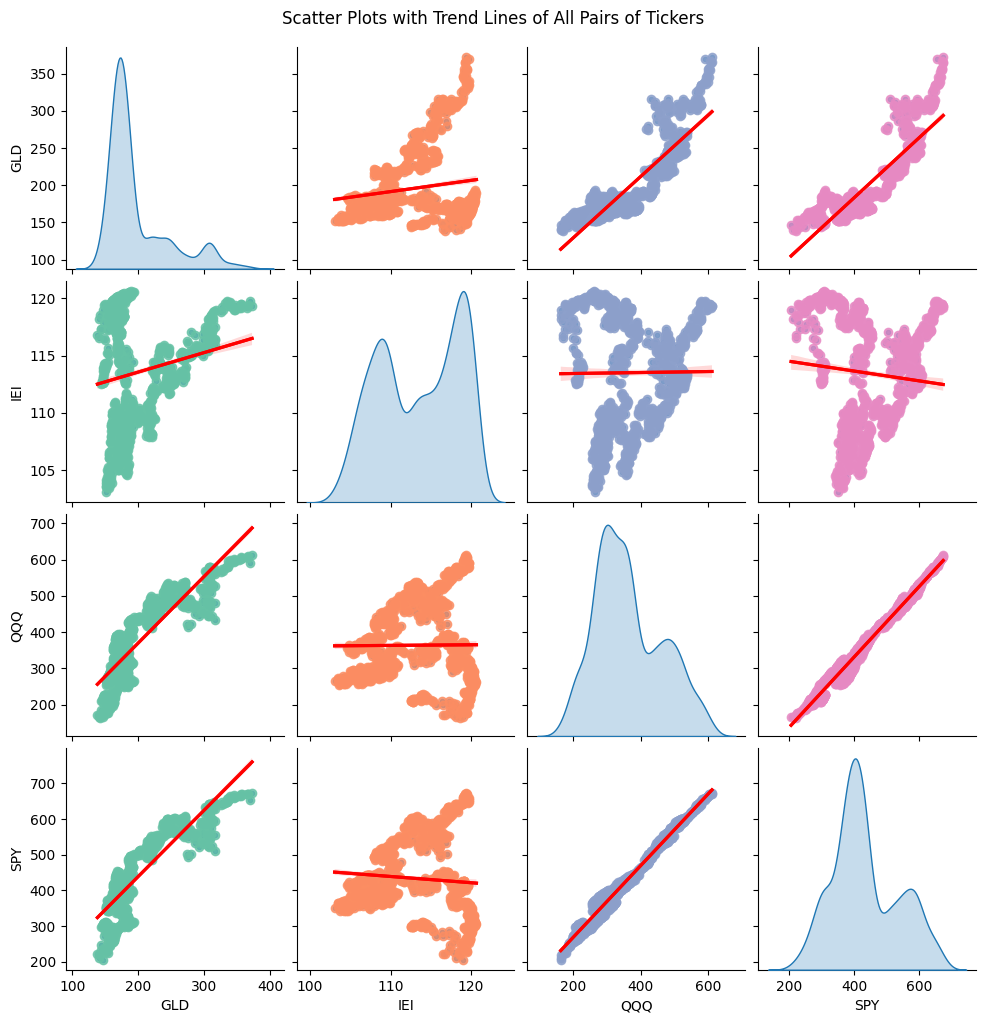

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# יצירת דיאגרמות פיזור עבור כל צמד מדדים עם קו מגמה
g = sns.pairplot(data, kind="reg", diag_kind="kde",  # יצירת Pairplot עם קו מגמה (reg) והפצת צפיפות על האלכסון (kde)
                 plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'s': 10}})  # קו מגמה אדום ונקודות פיזור קטנות (s=10)

# התאמת צבעים שונים לכל מדד
palette = sns.color_palette("Set2", len(data.columns))  # בחירת פלטת צבעים כדי לצבוע כל מדד בצבע שונה
for i, ax in enumerate(g.axes.flatten()):  # לולאה שעוברת על כל הצירים בתרשים ה-Pairplot
    if i % len(data.columns) != i // len(data.columns):  # דילוג על האלכסון כי שם נמצאים ההיסטוגרמות
        x = data.columns[i % len(data.columns)]  # קביעת ציר ה-X מתוך העמודות בנתונים
        y = data.columns[i // len(data.columns)]  # קביעת ציר ה-Y מתוך העמודות בנתונים
        sns.regplot(x=x, y=y, data=data, ax=ax,  # יצירת דיאגרמת פיזור עם קו מגמה
                   scatter_kws={'color': palette[i % len(data.columns)]},  # התאמת צבעים שונים לכל מדד בפיזור
                   line_kws={'color': 'red'},  # קו מגמה אדום
                   ci=None)  # ללא רווח בר סמך (confidence interval)

# כותרת עליונה לדיאגרמות
plt.suptitle('Scatter Plots with Trend Lines of All Pairs of Tickers', y=1.02)  # הוספת כותרת עליונה לכל התרשימים
plt.show()  # הצגת התרשים


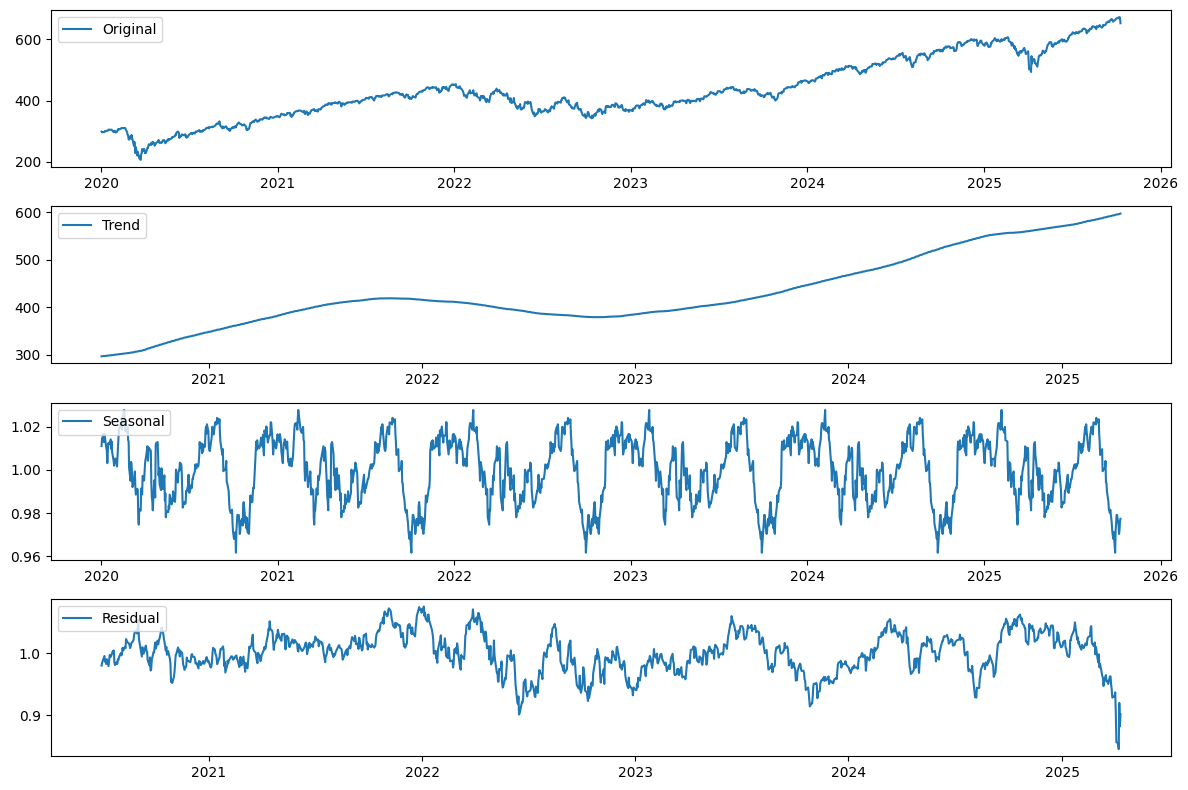

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['SPY'], model='multiplicative', period=250)

# הצגת גרפים
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data['SPY'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

ACF Values:
[1.         0.99472971 0.98988891 0.98487158 0.97985495 0.97496188
 0.96992854 0.96542012 0.96034197 0.95569513 0.95044357 0.94564334
 0.94076101 0.93614874 0.93171468 0.92736787 0.92330293 0.91914101
 0.91551846 0.91159159 0.90780791 0.90347889 0.89877982 0.89433609
 0.89023489 0.88610774 0.88209265 0.87839573 0.8743925  0.870068
 0.86567602]


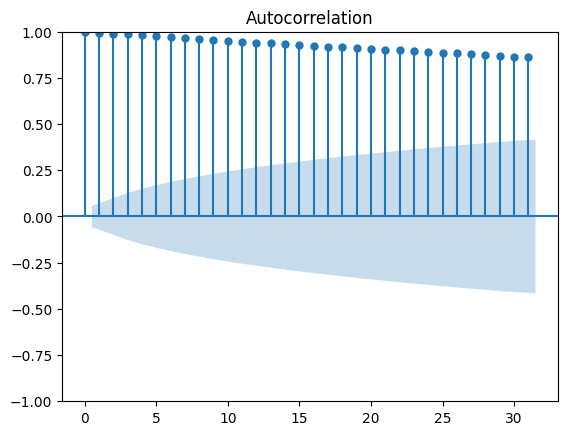

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

# חישוב ACF
acf_values = acf(data['SPY'])

# הדפסת ערכי ACF
print("ACF Values:")
print(acf_values)

# יצירת גרף ACF
plot_acf(data['SPY'])
plt.show()

In [ ]:
from pmdarima.arima.utils import ndiffs
# שימוש ב-pmdarima כדי למצוא את מספר הדיפרנציאציות הנדרש (אם לא ידוע מראש)
# תחילה יש להתקין את הספרייה: !pip install pmdarima
# להגדיר פרמטר d
d = ndiffs(data['SPY'], test='adf')
print(f'd = {d}')

d = 1


PACF Values (after differencing)
[ 1.00000000e+00 -7.58690581e-02  3.76884151e-02 -2.08876982e-02
 -2.48773737e-02  2.84006813e-02 -8.43486940e-02  9.52815183e-02
 -7.22298216e-02  1.17733903e-01 -4.50121977e-02  2.24467272e-02
 -1.29024261e-02 -1.10851907e-02  4.69745350e-03 -3.73240933e-02
 -3.10018696e-02 -3.25619507e-03  1.57439871e-02  1.51001881e-02
  3.94482365e-04  1.80824979e-02 -7.93648113e-02 -3.66370929e-02
  1.39023603e-02 -4.71193373e-02 -2.91917261e-02  5.30281933e-02
 -1.25751955e-02  1.75272126e-02 -3.96582853e-02]


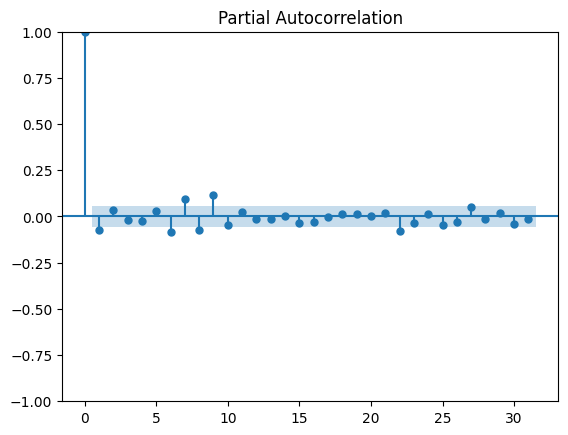

In [ ]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf


# ביצוע דיפרנציאציה מסדר ראשון
data_diff = data['SPY'].diff().dropna()

# חישוב ה-PACF על הנתונים המדיפרנציאלים
pacf_values = pacf(data_diff)

# הדפסת ערכי PACF
print("PACF Values (after differencing)")
print(pacf_values)

# יצירת גרף PACF
plot_pacf(data_diff)
plt.show()

In [ ]:

exog_vars['IEI_Lag1'] = exog_vars['IEI'].shift(1)
exog_vars['GLD_Lag1'] = exog_vars['GLD'].shift(1)
exog_vars['QQQ_Lag1'] = exog_vars['QQQ'].shift(1)


In [ ]:
exog_vars.to_csv('exog_vars.csv')

/tmp/ipython-input-2162859920.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exog_vars = exog_vars.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2162859920.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  predicted_mean = predicted_mean.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2162859920.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data = test_data.fillna(method='ffill').fillna(method='bfill')


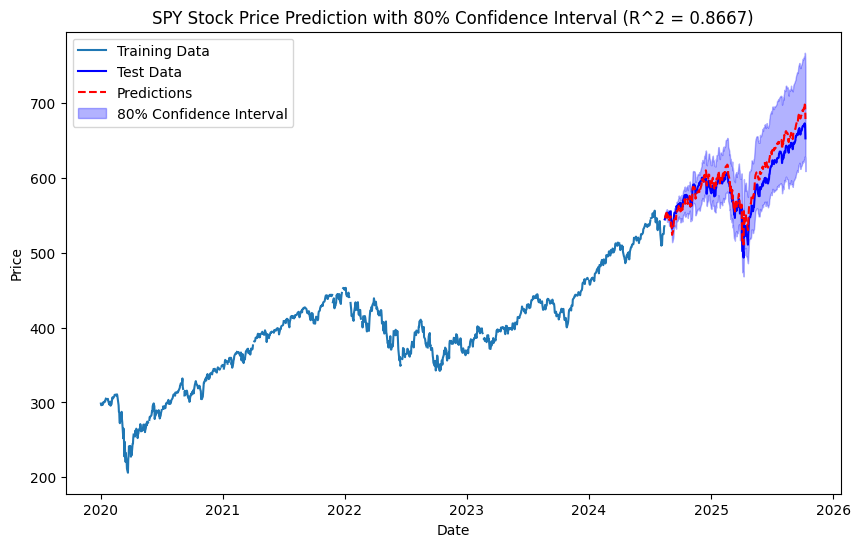

                                     SARIMAX Results                                     
Dep. Variable:                               SPY   No. Observations:                 1205
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -2293.030
Date:                           Tue, 14 Oct 2025   AIC                           4602.059
Time:                                   19:47:59   BIC                           4642.760
Sample:                               01-02-2020   HQIC                          4617.393
                                    - 08-14-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IEI           -0.7787      0.150     -5.194      0.000      -1.073      -0.485
GLD            0.0989      0.023      4.221

In [6]:
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# הבטחת תדירות ימי עסקים
spy_data = spy_data.asfreq('B')
exog_vars = exog_vars.asfreq('B')

# טיפול בערכים אינסופיים או חסרים במשתנים האקסוגניים
exog_vars = exog_vars.replace([np.inf, -np.inf], np.nan)
exog_vars = exog_vars.fillna(method='ffill').fillna(method='bfill')

# חלוקת הנתונים ל-80% אימון ו-20% בדיקה
train_size = int(len(spy_data) * 0.8)
train_data, test_data = spy_data[:train_size], spy_data[train_size:]
train_exog, test_exog = exog_vars[:train_size], exog_vars[train_size:]

# הגדרת מודל SARIMAX
model = SARIMAX(train_data,
                order=(1, 1, 1),  # ניתן לשנות בהתאם
                seasonal_order=(1, 1, 1, 7),  # ניתן לשנות בהתאם
                exog=train_exog)

# התאמת המודל
model_fit = model.fit(disp=False)

# תחזיות על סט הבדיקה
predictions = model_fit.get_prediction(start=test_data.index[0], end=test_data.index[-1], exog=test_exog)
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int(alpha=0.2)  # רווח בר סמך 80%

# טיפול ב-NaN
predicted_mean = predicted_mean.fillna(method='ffill').fillna(method='bfill')
test_data = test_data.fillna(method='ffill').fillna(method='bfill')

# חישוב R²
r2 = r2_score(test_data, predicted_mean)

# גרף תחזיות עם רווח בר סמך 80%
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data', color='blue')
plt.plot(predicted_mean.index, predicted_mean, label='Predictions', color='red', linestyle='--')
plt.fill_between(predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='blue', alpha=0.3, label='80% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'SPY Stock Price Prediction with 80% Confidence Interval (R^2 = {r2:.4f})')
plt.legend()
plt.show()

# סיכום המודל
print(model_fit.summary())


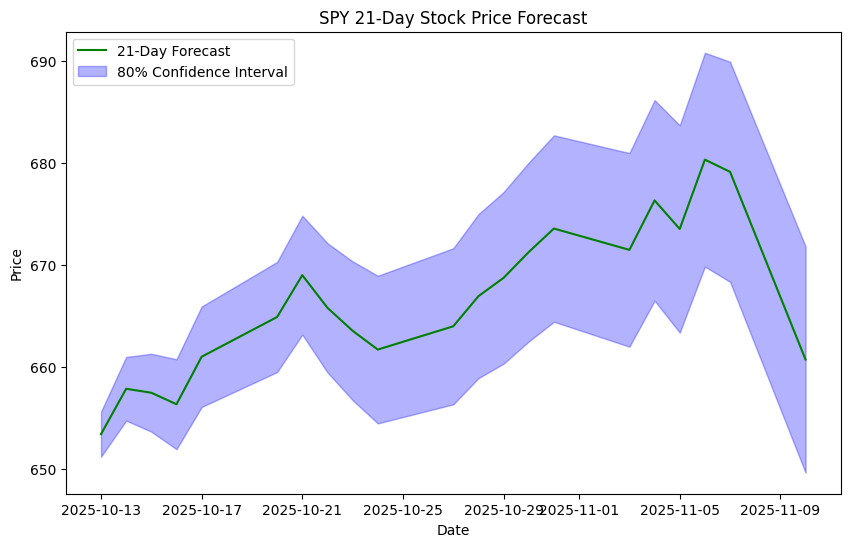

                                     SARIMAX Results                                     
Dep. Variable:                               SPY   No. Observations:                 1205
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -2293.030
Date:                           Tue, 14 Oct 2025   AIC                           4602.059
Time:                                   19:50:28   BIC                           4642.760
Sample:                               01-02-2020   HQIC                          4617.393
                                    - 08-14-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IEI           -0.7787      0.150     -5.194      0.000      -1.073      -0.485
GLD            0.0989      0.023      4.221

In [9]:
# תחזית 21 ימים קדימה (future forecast) עם הנתונים הכי עדכניים
forecast = model_fit.get_forecast(steps=21, exog=test_exog[-21:])  # תחזית 21 ימים
forecast_values = forecast.predicted_mean
conf_int_forecast = forecast.conf_int(alpha=0.2)  # רווח בר סמך 80%

# הרחבת הציר של התחזית כדי שהנתונים לא יופיעו על אותו ציר
forecast_index = pd.date_range(start=spy_data.index[-1] + pd.Timedelta(days=1), periods=21, freq='B')

# גרף תחזית 21 ימים בלבד עם רווח בר סמך 80%
plt.figure(figsize=(10, 6))
plt.plot(forecast_index, forecast_values, label='21-Day Forecast', color='green')
plt.fill_between(forecast_index, conf_int_forecast.iloc[:, 0], conf_int_forecast.iloc[:, 1], color='blue', alpha=0.3, label='80% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SPY 21-Day Stock Price Forecast')
plt.legend()
plt.show()

# הדפסת סיכום המודל
print(model_fit.summary())

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm  # ייבוא של pmdarima לחיפוש אוטומטי של ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# הבטחת קיום תדירות יומית בנתונים וימי עסקים

# הגדרת התאריכים להורדת הנתונים
start_date = '2020-02-01'
end_date = '2024-09-01'

# הורדת הנתונים מ-Yahoo Finance
tickers = ['SPY', 'IEI', 'GLD','QQQ']
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# הגדרת סדרת הזמן והמשתנים האקסוגניים
spy_data = data['SPY']
exog_vars = data[[ 'IEI', 'GLD','QQQ' ]]

exog_vars['IEI_Lag1'] = exog_vars['IEI'].shift(1)
exog_vars['GLD_Lag1'] = exog_vars['GLD'].shift(1)
exog_vars['QQQ_Lag1'] = exog_vars['QQQ'].shift(1)

spy_data = spy_data.asfreq('B')  # 'B' - ימי עסקים
exog_vars = exog_vars.asfreq('B')

# טיפול בערכים חסרים או אינסופיים במשתנים האקסוגניים
exog_vars = exog_vars.ffill().bfill()  # מילוי קדימה ואחורה של ערכים חסרים
spy_data = spy_data.ffill().bfill()    # אותו דבר עבור נתוני SPY

# בדיקה שאין NaN אחרי הטיפול
if exog_vars.isnull().values.any() or spy_data.isnull().values.any():
    raise ValueError("There are still NaN values in the data after forward and backward filling.")

# חלוקת הנתונים ל-80% אימון ו-20% בדיקה
train_size = int(len(spy_data) * 0.8)
train_data, test_data = spy_data[:train_size], spy_data[train_size:]
train_exog, test_exog = exog_vars[:train_size], exog_vars[train_size:]

# חיפוש אוטומטי של הפרמטרים עם מגבלות והגדרות התחלתיות
auto_model = pm.auto_arima(train_data,
                          xreg=train_exog,
                          seasonal=True,
                          m=7,  # עונתיות כל 21 יום
                          stepwise=False,
                          information_criterion='bic',
                          suppress_warnings=True,
                          with_intercept=True,
                          trace=True)

# התאמת המודל הסופי
fitted_model = auto_model.fit(train_data, exogenous=train_exog)

# הדפסת summary של המודל
print(fitted_model.summary())



# תחזיות על סט הבדיקה
predictions = fitted_model.predict(n_periods=len(test_data), exogenous=test_exog)
predicted_mean = pd.Series(predictions, index=test_data.index)


# טיפול ב-NaN
predicted_mean = predicted_mean.fillna(method='ffill').fillna(method='bfill')
test_data = test_data.fillna(method='ffill').fillna(method='bfill')

# חישוב R²
r2 = r2_score(test_data, predicted_mean)

# גרף תחזיות על סט הבדיקה
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data', color='blue')
plt.plot(predicted_mean.index, predicted_mean, label='Predictions', color='red', linestyle='--')
plt.title(f'SPY Stock Price Prediction with 80% Confidence Interval (R^2 = {r2:.4f})')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SPY Stock Price Prediction')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
start_p=1,  # ערך התחלתי ל-AR
                           start_q=1,  # ערך התחלתי ל-MA
                           start_d=0,  # ערך התחלתי לדיפרנציאציה
                           start_P=1,  # ערך התחלתי לרכיב AR עונתי
                           start_Q=1,  # ערך התחלתי לרכיב MA עונתי
                           start_D=0,  # ערך התחלתי לדיפרנציאציה עונתית
                           max_p=2,  # מקסימום פיגורים לאוטורגרסיבי
                           max_q=2,  # מקסימום פיגורים לממוצע נע
                           max_d=1,  # מקסימום דרגות דיפרנציאציה
                           max_P=2,  # מקסימום עונתיות לרכיב AR
                           max_Q=2,  # מקסימום עונתיות לרכיב MA
                           max_D=1,  # מקסימום דרגות דיפרנציאציה עונתית

[*********************100%***********************]  4 of 4 completed
<ipython-input-21-bca6d13712cd>:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exog_vars = exog_vars.fillna(method='ffill').fillna(method='bfill')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['disp']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 3, 0), (2, 3, 1), (2, 3, 2), (2, 3, 3), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 3, 0), (3, 3, 1), (3, 3, 2), (3, 3, 3)]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 1)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['disp']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['disp']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 3)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['disp']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


(0, 1, 0)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['disp']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['disp']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['disp']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['disp']).Passing unknown keyword argument

Best AIC: 3754.8767255196235, Best Order: (0, 1, 0), Best Seasonal Order: None
(0, 1, 0)


<ipython-input-21-bca6d13712cd>:100: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  predicted_mean = predicted_mean.fillna(method='ffill').fillna(method='bfill')
<ipython-input-21-bca6d13712cd>:101: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data = test_data.fillna(method='ffill').fillna(method='bfill')


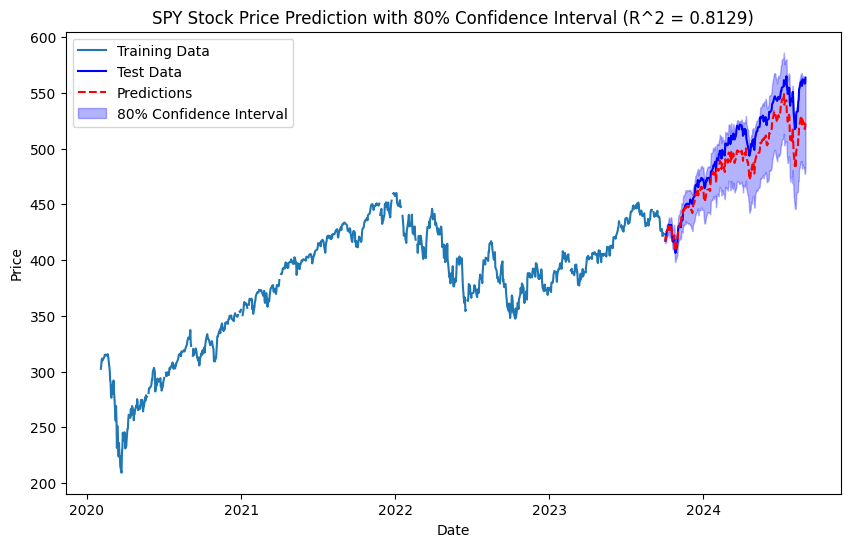

                                      SARIMAX Results                                       
Dep. Variable:                                  SPY   No. Observations:                  956
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1888.763
Date:                              Sat, 07 Sep 2024   AIC                           3795.527
Time:                                      21:04:56   BIC                           3839.168
Sample:                                  02-03-2020   HQIC                          3812.161
                                       - 10-02-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IEI           -1.0274      0.175     -5.877      0.000      -1.370      -0.685
GLD            0.07

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm  # ייבוא של pmdarima לחיפוש אוטומטי של ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# הגדרת התאריכים להורדת הנתונים
start_date = '2020-02-01'
end_date = '2024-09-01'

# הורדת הנתונים מ-Yahoo Finance
tickers = ['SPY', 'IEI', 'GLD','QQQ']
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']


# הגדרת סדרת הזמן והמשתנים האקסוגניים
spy_data = data['SPY']
exog_vars = data[[ 'IEI', 'GLD','QQQ' ]]

exog_vars['IEI_Lag1'] = exog_vars['IEI'].shift(1)
exog_vars['GLD_Lag1'] = exog_vars['GLD'].shift(1)
exog_vars['QQQ_Lag1'] = exog_vars['QQQ'].shift(1)

# הבטחת קיום תדירות בנתונים
spy_data = spy_data.asfreq('B')  # 'B' מייצג ימי עסקים
exog_vars = exog_vars.asfreq('B')

# טיפול בערכים חסרים או אינסופיים במשתנים האקסוגניים
exog_vars = exog_vars.replace([np.inf, -np.inf], np.nan)
exog_vars = exog_vars.fillna(method='ffill').fillna(method='bfill')

# חלוקת הנתונים ל-80% אימון ו-20% בדיקה
train_size = int(len(spy_data) * 0.8)
train_data, test_data = spy_data[:train_size], spy_data[train_size:]
train_exog, test_exog = exog_vars[:train_size], exog_vars[train_size:]

import itertools

# Define the range of values for p, d, q
p = d = q = range(0, 4)

# Generate all possible combinations of p, d, q
pdq = list(itertools.product(p, d, q))
print(pdq)

# Generate all possible combinations of seasonal p, d, q with m = 12
#seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = float("inf")
best_bic = float("inf")
best_order = None
best_seasonal_order = None

# Iterate through all parameter combinations
for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(train_data,
                            order=param,
                            seasonal_order=(1, 0, 1, 7),
                            #seasonal_order=param_seasonal,
                            disp=False,
                            exog=train_exog)

            model_fit = model.fit()

            aic = model_fit.aic
            bic = model_fit.bic

            if aic < best_aic:
                best_aic = aic
                best_order = param
                print(best_order)
                #best_seasonal_order = param_seasonal
            if bic < best_bic:

                best_bic = bic

        except:
            continue

print('Best AIC: {}, Best Order: {}, Best Seasonal Order: {}'.format(best_aic, best_order, best_seasonal_order))
print(best_order)
# Train the model with the best parameters
best_model = SARIMAX(train_data,
                        order=best_order,
                        seasonal_order=(1, 1, 1, 12),
                        exog=train_exog)

best_model_fit = best_model.fit()

# ... rest of your code for predictions and evaluation

# תחזיות על סט הבדיקה
predictions = best_model_fit.get_prediction(start=test_data.index[0], end=test_data.index[-1], exog=test_exog)
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int(alpha=0.2)  # רווח בר סמך 80%
# טיפול ב-NaN
predicted_mean = predicted_mean.fillna(method='ffill').fillna(method='bfill')
test_data = test_data.fillna(method='ffill').fillna(method='bfill')

# חישוב R²
r2 = r2_score(test_data, predicted_mean)


# גרף תחזיות על סט הבדיקה עם רווח בר סמך 80%
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data', color='blue')
plt.plot(predicted_mean.index, predicted_mean, label='Predictions', color='red', linestyle='--')
plt.fill_between(predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='blue', alpha=0.3, label='80% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SPY Stock Price Prediction with 80% Confidence Interval')
plt.title(f'SPY Stock Price Prediction with 80% Confidence Interval (R^2 = {r2:.4f})')
plt.legend()
plt.show()

print(best_model_fit.summary())

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm  # ייבוא של pmdarima לחיפוש אוטומטי של ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# הגדרת התאריכים להורדת הנתונים
start_date = '2020-02-01'
end_date = '2024-09-01'

# הורדת הנתונים מ-Yahoo Finance
tickers = ['SPY', 'IEI', 'GLD','QQQ']
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']


# הגדרת סדרת הזמן והמשתנים האקסוגניים
spy_data = data['SPY']
exog_vars = data[[ 'IEI', 'GLD','QQQ' ]]

exog_vars['IEI_Lag1'] = exog_vars['IEI'].shift(1)
exog_vars['GLD_Lag1'] = exog_vars['GLD'].shift(1)
exog_vars['QQQ_Lag1'] = exog_vars['QQQ'].shift(1)

# הבטחת קיום תדירות בנתונים
spy_data = spy_data.asfreq('B')  # 'B' מייצג ימי עסקים
exog_vars = exog_vars.asfreq('B')

# טיפול בערכים חסרים או אינסופיים במשתנים האקסוגניים
exog_vars = exog_vars.replace([np.inf, -np.inf], np.nan)
exog_vars = exog_vars.fillna(method='ffill').fillna(method='bfill')

# חלוקת הנתונים ל-80% אימון ו-20% בדיקה
train_size = int(len(spy_data) * 0.8)
train_data, test_data = spy_data[:train_size], spy_data[train_size:]
train_exog, test_exog = exog_vars[:train_size], exog_vars[train_size:]

import itertools

# Define the range of values for p, d, q
p = d = q = range(0, 5)

# Generate all possible combinations of p, d, q
pdq = list(itertools.product(p, d, q))
print(pdq)

# Generate all possible combinations of seasonal p, d, q with m = 12
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = float("inf")
best_bic = float("inf")
best_order = None
best_seasonal_order = None

# Iterate through all parameter combinations
for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(train_data,
                            order=param,
                            seasonal_order=(1, 1, 1, 12),
                            seasonal_order=param_seasonal,
                            disp=False,
                            exog=train_exog)

            model_fit = model.fit()

            aic = model_fit.aic
            bic = model_fit.bic

            if aic < best_aic:
                best_aic = aic
                best_order = param
                print(best_order)
                best_seasonal_order = param_seasonal
            if bic < best_bic:

                best_bic = bic

        except:
            continue

print('Best AIC: {}, Best Order: {}, Best Seasonal Order: {}'.format(best_aic, best_order, best_seasonal_order))
print(best_order)
# Train the model with the best parameters
best_model = SARIMAX(train_data,
                        order=best_order,
                        seasonal_order=(1, 1, 1, 12),
                        exog=train_exog)

best_model_fit = best_model.fit()

# ... rest of your code for predictions and evaluation

# תחזיות על סט הבדיקה
predictions = best_model_fit.get_prediction(start=test_data.index[0], end=test_data.index[-1], exog=test_exog)
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int(alpha=0.2)  # רווח בר סמך 80%



# גרף תחזיות על סט הבדיקה עם רווח בר סמך 80%
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data', color='blue')
plt.plot(predicted_mean.index, predicted_mean, label='Predictions', color='red', linestyle='--')
plt.fill_between(predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='blue', alpha=0.3, label='80% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SPY Stock Price Prediction with 80% Confidence Interval')
plt.legend()
plt.show()

print(best_model_fit.summary())

✅ Available tickers: ['SPY', '^TNX', '^VIX', 'CL=F', 'GC=F', '^IXIC']
Train: 1357 rows, Test: 151 rows
Exogenous variables used: ['TNX', 'VIX', 'Crude', 'Gold', 'Nasdaq', 'Volume']
                                     SARIMAX Results                                     
Dep. Variable:                               SPY   No. Observations:                 1357
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 5)   Log Likelihood               -2396.015
Date:                           Tue, 14 Oct 2025   AIC                           4814.030
Time:                                   20:04:50   BIC                           4871.268
Sample:                               01-02-2020   HQIC                          4835.470
                                    - 03-14-2025                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------

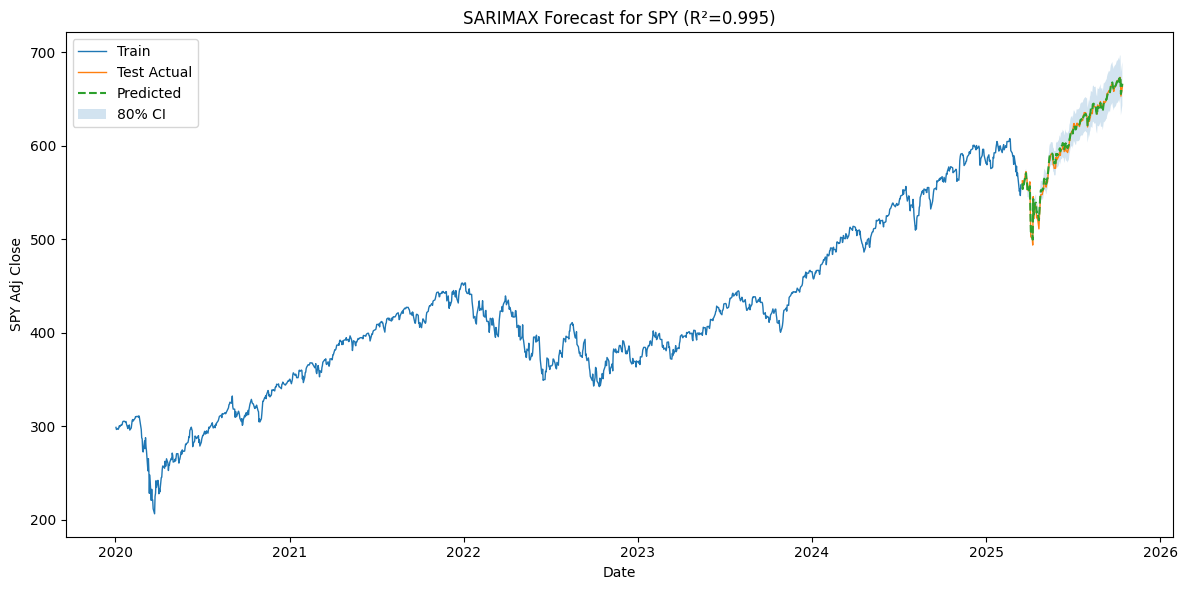


Exogenous variable coefficients:
TNX        2.019076
VIX       -3.082114
Crude      0.916244
Gold       0.714840
Nasdaq    54.770666
Volume    -0.015568
dtype: float64


In [13]:
# ==========================================
# חיזוי SPY עם SARIMAX + משתנים אקסוגניים
# כולל טיפול בטיקרים חסרים ו-bug של yfinance
# ==========================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from datetime import datetime

# -------------------------
# פרמטרים כלליים
# -------------------------
start_date = "2020-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")
target_ticker = "SPY"

# טיקרים אקסוגניים
exog_tickers = {
    "TNX": "^TNX",      # אג"ח 10 שנים
    "VIX": "^VIX",      # מדד הפחד
    "Crude": "CL=F",    # נפט
    "Gold": "GC=F",     # זהב
    "Nasdaq": "^IXIC",  # נאסד"ק
    # "DXY": "^DXY"      # ניתן להחזיר אם ירד בהצלחה
}

# -------------------------
# הורדת נתונים עם תיקון ל-auto_adjust
# -------------------------
symbols = [target_ticker] + list(exog_tickers.values())
print(f"Downloading data for: {symbols}")

raw = yf.download(
    symbols,
    start=start_date,
    end=end_date,
    progress=False,
    auto_adjust=False,   # חשוב מאוד! שומר על MultiIndex תקין
    group_by='ticker'    # לכל טיקר בלוק משלו
)

# -------------------------
# בדיקה אילו טיקרים ירדו בפועל
# -------------------------
available_tickers = [t for t in symbols if t in raw.columns.get_level_values(0)]
print("✅ Available tickers:", available_tickers)

if len(available_tickers) == 0:
    raise ValueError("❌ No data downloaded from Yahoo Finance. Please check internet or tickers list.")

# -------------------------
# בניית DataFrame של מחירי Adj Close
# -------------------------
adj_close = pd.DataFrame()
for t in available_tickers:
    try:
        adj_close[t] = raw[t]['Adj Close']
    except Exception:
        continue

# בדוק ש-SPY באמת ירד
if target_ticker not in adj_close.columns:
    raise ValueError(f"❌ SPY not found in downloaded data! Available columns: {adj_close.columns.tolist()}")

spy = adj_close[target_ticker].rename("SPY")

# -------------------------
# משתנים אקסוגניים
# -------------------------
exog = pd.DataFrame()
for name, symbol in exog_tickers.items():
    if symbol in adj_close.columns:
        exog[name] = adj_close[symbol]
    else:
        print(f"⚠️ Missing exogenous data for {name} ({symbol})")

# הוספת נפח מסחר של SPY (אם קיים)
try:
    vol = raw[target_ticker]['Volume']
    exog["Volume"] = vol
except Exception:
    pass

# -------------------------
# סידור תאריכים וניקוי נתונים
# -------------------------
spy = spy.asfreq('B').ffill().bfill()
exog = exog.asfreq('B').replace([np.inf, -np.inf], np.nan).ffill().bfill().fillna(0)

# -------------------------
# חלוקה ל-Train/Test
# -------------------------
n = len(spy)
train_size = int(0.9 * n)
train_y = spy.iloc[:train_size]
test_y  = spy.iloc[train_size:]
train_exog = exog.iloc[:train_size]
test_exog  = exog.iloc[train_size:]

print(f"Train: {len(train_y)} rows, Test: {len(test_y)} rows")
print("Exogenous variables used:", list(exog.columns))

# -------------------------
# נרמול משתנים אקסוגניים
# -------------------------
scaler = StandardScaler()
train_exog_scaled = pd.DataFrame(
    scaler.fit_transform(train_exog),
    index=train_exog.index,
    columns=train_exog.columns
)
test_exog_scaled = pd.DataFrame(
    scaler.transform(test_exog),
    index=test_exog.index,
    columns=test_exog.columns
)

# -------------------------
# מודל SARIMAX
# -------------------------
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 5)  # שבוע מסחר = 5 ימי עסקים

model = SARIMAX(
    train_y,
    order=order,
    seasonal_order=seasonal_order,
    exog=train_exog_scaled,
    enforce_stationarity=False,
    enforce_invertibility=False
)
model_fit = model.fit(disp=False, maxiter=200)
print(model_fit.summary())

# -------------------------
# תחזית על סט הבדיקה
# -------------------------
pred = model_fit.get_prediction(
    start=test_y.index[0],
    end=test_y.index[-1],
    exog=test_exog_scaled
)
pred_mean = pred.predicted_mean.ffill().bfill()
conf_int = pred.conf_int(alpha=0.2)
test_y = test_y.ffill().bfill()

# -------------------------
# מדדים
# -------------------------
r2 = r2_score(test_y, pred_mean)
rmse = np.sqrt(mean_squared_error(test_y, pred_mean))
mae = mean_absolute_error(test_y, pred_mean)
print(f"\nR²={r2:.4f}, RMSE={rmse:.4f}, MAE={mae:.4f}")

# -------------------------
# גרף תוצאות
# -------------------------
plt.figure(figsize=(12,6))
plt.plot(train_y.index, train_y, label="Train", linewidth=1)
plt.plot(test_y.index, test_y, label="Test Actual", linewidth=1)
plt.plot(pred_mean.index, pred_mean, label="Predicted", linestyle="--", linewidth=1.5)
plt.fill_between(pred_mean.index, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2, label="80% CI")
plt.title(f"SARIMAX Forecast for SPY (R²={r2:.3f})")
plt.xlabel("Date")
plt.ylabel("SPY Adj Close")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------
# מקדמים של המשתנים האקסוגניים
# -------------------------
params = model_fit.params
exog_params = params[[p for p in params.index if any(col in p for col in train_exog.columns)]]
print("\nExogenous variable coefficients:")
print(exog_params)


In [2]:
# Uninstall existing problematic packages
!pip uninstall -y numpy pandas pmdarima

# Install versions compatible with Colab's environment
!pip install numpy==1.26.4  # Version compatible with TensorFlow, Numba, etc.
!pip install pandas==2.2.2  # Version required by Google Colab
!pip install pmdarima==2.0.4  # Install pmdarima after numpy/pandas

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 89.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.49.0 requires pandas<3.0,>=1.0, which is not installed.
shap 0.48.0 requires pandas, which is not installed.
mizani 0.13.5 requires pandas>=2.2.0, which is not installed.
bokeh 3.7.3 requires pandas>=1.2, which is not installed.
tsfresh 0.21.1 requires pandas>=0.25.0, which is not installed.
yfinance 0.2.66 requires pandas>=1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 90.1 MB/s eta 0:00:00


  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.3 MB)


/tmp/ipython-input-4067170350.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(all_tickers, start=start_date, end=end_date, progress=False)


              TNX        VIX      Crude         Gold        Nasdaq        DXY  \
Date                                                                            
2020-02-03  1.520  17.969999  50.110001  1577.199951   9273.400391  97.800003   
2020-02-04  1.603  16.049999  49.610001  1550.400024   9467.969727  97.959999   
2020-02-05  1.649  15.150000  50.750000  1557.800049   9508.679688  98.269997   
2020-02-06  1.644  14.960000  50.950001  1565.099976   9572.150391  98.500000   
2020-02-07  1.578  15.470000  50.320000  1568.599976   9520.509766  98.680000   
...           ...        ...        ...          ...           ...        ...   
2025-10-03  4.119  16.650000  60.880001  3880.800049  22780.509766  97.720001   
2025-10-06  4.162  16.370001  61.689999  3948.500000  22941.669922  98.110001   
2025-10-07  4.127  17.240000  61.730000  3976.600098  22788.359375  98.580002   
2025-10-08  4.129  16.299999  62.549999  4043.300049  23043.380859  98.849998   
2025-10-09  4.148  16.430000

/tmp/ipython-input-4067170350.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
/tmp/ipython-input-4067170350.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:4

                                     SARIMAX Results                                     
Dep. Variable:                               SPY   No. Observations:                 1289
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -2421.446
Date:                           Tue, 14 Oct 2025   AIC                           4866.893
Time:                                   20:37:15   BIC                           4928.673
Sample:                                        0   HQIC                          4890.098
                                          - 1289                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
TNX            2.1930   9.71e-05   2.26e+04      0.000       2.193       2.193
VIX           -0.3255      0.030    -10.929

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


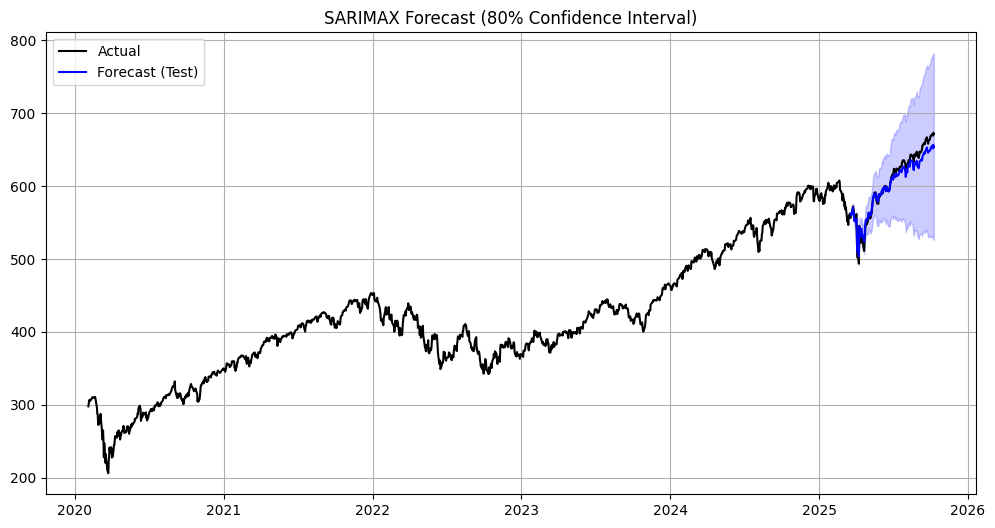

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [17]:
!pip install yfinance statsmodels matplotlib --quiet

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# === 1. הגדרת הנכסים והתקופה ===
target_ticker = 'SPY'
exog_tickers = {
    "TNX": "^TNX",       # תשואת אג"ח 10 שנים
    "VIX": "^VIX",       # מדד הפחד
    "Crude": "CL=F",     # נפט גולמי
    "Gold": "GC=F",      # זהב
    "Nasdaq": "^IXIC",   # נאסד"ק
    "DXY": "DX-Y.NYB"    # מדד דולר
}
start_date = '2020-02-01'
end_date = '2025-10-10'

# === 2. הורדת נתוני סגירה מ-Yahoo Finance ===
all_tickers = [target_ticker] + list(exog_tickers.values())
data = yf.download(all_tickers, start=start_date, end=end_date, progress=False)

# === 3. יצירת טבלת Close ו-Volume ===
close = data['Close']
vol = data['Volume'][target_ticker]  # נפח המסחר של SPY בלבד

# === 4. טיפול בערכים חסרים ===
close = close.ffill().bfill()
close.dropna(inplace=True)
close.to_csv('data.csv')
# === 5. יצירת טבלת exogenous משתנים ===
exog = pd.DataFrame({
    "TNX": close[exog_tickers["TNX"]],
    "VIX": close[exog_tickers["VIX"]],
    "Crude": close[exog_tickers["Crude"]],
    "Gold": close[exog_tickers["Gold"]],
    "Nasdaq": close[exog_tickers["Nasdaq"]],
    "DXY": close[exog_tickers["DXY"]],
    "Volume": vol
})
print(exog)
# === 6. סדרות יעד ואקסוגניות ===
y = close[target_ticker]
X = exog

# === 7. חלוקה לסט אימון ובדיקה (90/10) ===
train_size = int(len(y) * 0.9)
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
X_train.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
X_train = X_train.ffill().bfill()

X_test.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
X_test = X_test.ffill().bfill()

# === 8. בניית מודל SARIMAX ===
# כאן ניתן להתאים את סדרות ARIMA (p,d,q) לפי auto_arima או ידנית
model = SARIMAX(
    y_train,
    exog=X_train,
    order=(1,1,1),        # ARIMA(p,d,q) - ניתן לשנות לפי תוצאות auto_arima
    seasonal_order=(1,1,1,7),  # SARIMA(P,D,Q,s) - אם אין עונתיות
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarimax_result = model.fit(disp=False)
print(sarimax_result.summary())

# === 9. תחזית על סט הבדיקה ===
forecast = sarimax_result.get_forecast(steps=len(y_test), exog=X_test)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.2)  # 80% confidence

# === 10. גרף חיזוי על סט הבדיקה ===
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual', color='black')
plt.plot(y_test.index, forecast_mean, label='Forecast (Test)', color='blue')
plt.fill_between(y_test.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='blue', alpha=0.2)
plt.title('SARIMAX Forecast (80% Confidence Interval)')
plt.legend()
plt.grid()
plt.show()

# === 11. חיזוי קדימה ל-21 ימים ===
future_exog = X_test.iloc[-21:]
forecast_21 = sarimax_result.get_forecast(steps=21, exog=future_exog)
forecast_21_mean = forecast_21.predicted_mean
conf_21 = forecast_21.conf_int(alpha=0.1)  # 90% confidence

future_dates = pd.date_range(start=y.index[-1] + pd.Timedelta(days=1), periods=21, freq='B')

#

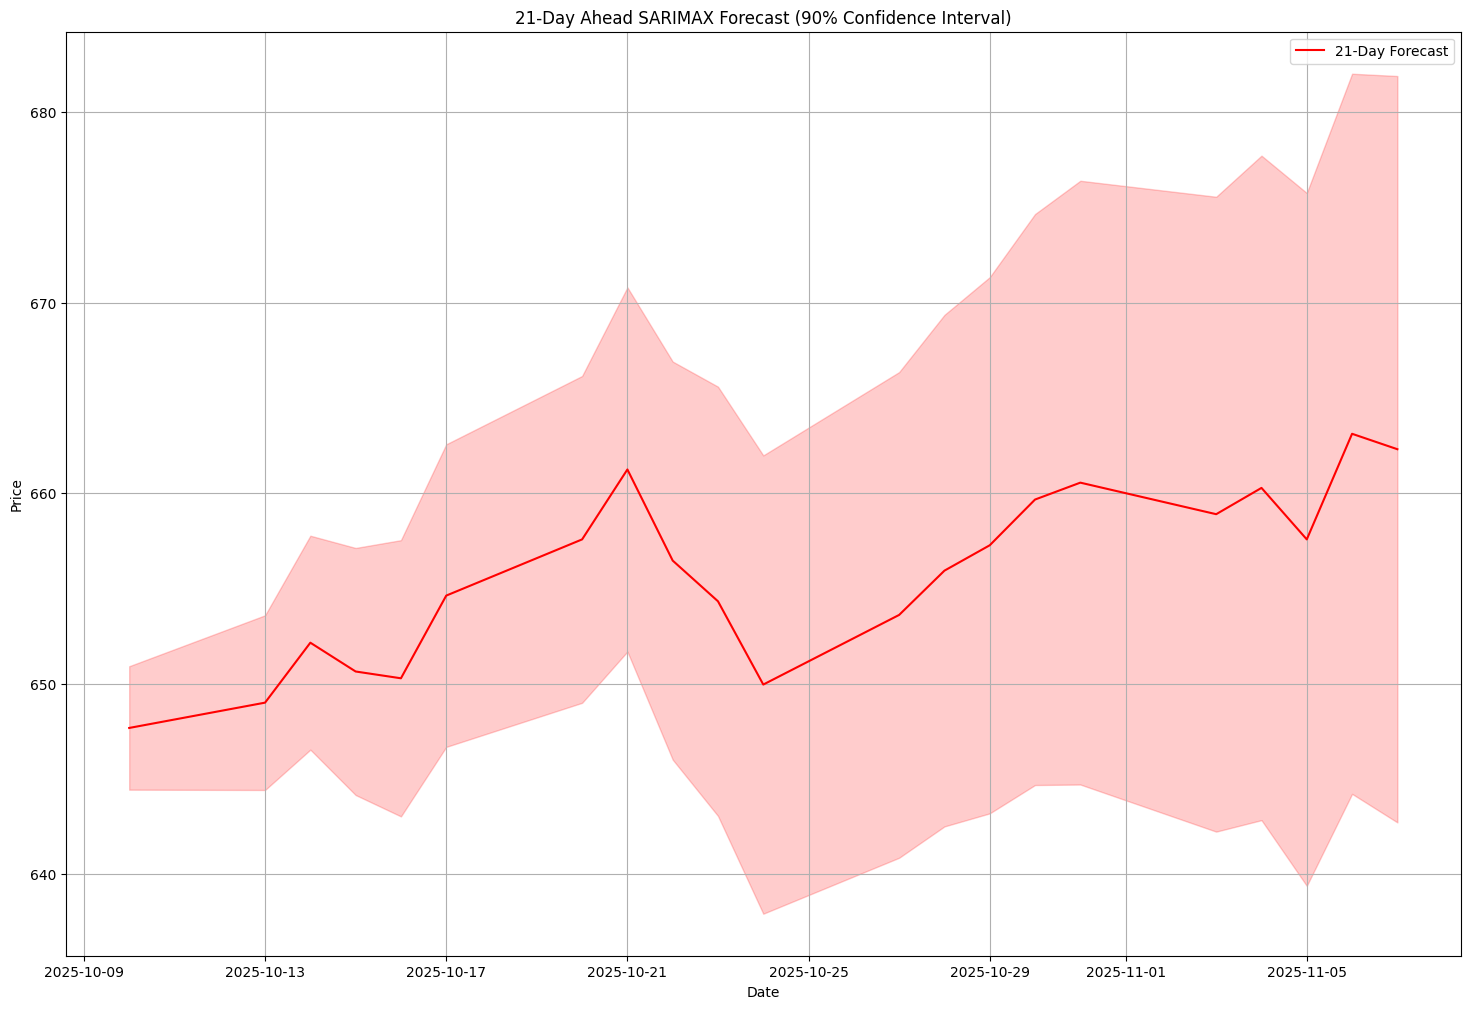

In [18]:
# === גרף חיזוי קדימה בלבד (21 יום) ===
plt.figure(figsize=(18, 12))
plt.plot(future_dates, forecast_21_mean, label='21-Day Forecast', color='red')
plt.fill_between(future_dates, conf_21.iloc[:,0], conf_21.iloc[:,1], color='red', alpha=0.2)
plt.title('21-Day Ahead SARIMAX Forecast (90% Confidence Interval)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()
